# TIME SERIES ANALYSIS FOR SENSOR DATA

## Summary of Data: 

1. We are attaching a time series data from one the sensor deployed in the field, this is capturing voltage at an electrical line.
2. Data is samples at 1 minute interval and for 2 months.
3. Here, below are the definition of each data point:
    -  voltage >  0 means   good power,
    -  Voltage == 0 means  Power failure but UPS giving backup
    -  Voltage data missing means UPS is fully discharged 
    
## Problem Statement:

#### Summarise the instances of Power Failure on the following grounds:
    1. Number & Duration of Power Failures.
    2. Number of times & Duration for which UPS did not provide any backup.
    3. Number of times & Duration for which UPS provided backup.
    4. Any Trends/Patterns in the Power Failure.
    5. Compare the UPS performance at 2 sites

__Also compare the two sites on the basis of above analysis.__
__Try to summarise your observations using some self-explanatory plots.__

***
## Solution Section


### Loading Libraries

1. Numpy
2. Pandas
4. Matplotlib
6. OS

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization library
import os
import warnings            

warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style.
print(os.listdir(r'C:\Users\kiish\Downloads\Projects'))

['.ipynb_checkpoints', 'VoltageData.ipynb', 'voltage_data.csv']


### Loading and Describing Data

#### voltage_data.csv

Loading the time series data from CSV file contining data from the sensor deployed in the field

1. capturing voltage at an electrical line.
2. Data is samples at 1 minute interval and for 2 months.
3. Here, below are the definition of each data point:

    - voltage > 0 means good power,
    - Voltage == 0 means Power failure but UPS giving backup
    - Voltage data missing means UPS is fully discharged
    
    
#### Data Description

1. datetime : Data and Timestamp of recorded sensor readings	
2. Site-1   : Sensor readings from Site 1.
3. Site-2   : Sensor readings from Site 1.


In [2]:
df = pd.read_csv(r'C:\Users\kiish\Downloads\Projects\voltage_data.csv') # Loadin data from CSV
df.info()
df.head() # taking a glimpse of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100800 entries, 0 to 100799
Data columns (total 3 columns):
datetime    100800 non-null object
Site-1      99820 non-null float64
Site-2      99380 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


,datetime,Site-1,Site-2
0,2018-07-13 00:00:00,NaN,218.569656
1,2018-07-13 00:01:00,NaN,219.436111
2,2018-07-13 00:02:00,NaN,218.774620
3,2018-07-13 00:03:00,NaN,219.015736
4,2018-07-13 00:04:00,NaN,218.692177


__From the above info and Head statement we get that there is 100800 records in datetime column whereas other two sensor data columns are having only 99820 and 99380 records. This means that we have missing data in those columns but according to our problem statement missing records represents scenario where power cut and ups outage both occurs simultaneously.__

__so we cannot get rid of those records so we will create numeric dummy variables for this__

### Data Cleaning & Preparation

For analysis Purpose we will redesign our dataframe to have following fields

1. date
2. time
3. day_of_week
4. site_1
5. site_2


To handel missing data and to make data points comparable we will replace the site values on following criteria

1. voltage >  0 means   good power,                        : __Replaced with +1__
2. Voltage == 0 means  Power failure but UPS giving backup : __Replaced wiht 0.00001 (for aggregation purpose we are cann't make it zero)__
3. Voltage data missing means UPS is fully discharged      : __Replaced with -1__

In [3]:
df.columns = ['datetime', 'site_1', 'site_2']
df = df.fillna(-1)
df.loc[(df['site_1'] > 0), 'site_1'] = 1
df.loc[(df['site_2'] > 0), 'site_2'] = 1
df.loc[(df['site_1'] == 0), 'site_1'] = 0.0001
df.loc[(df['site_2'] == 0), 'site_2'] = 0.0001

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = [d.date() for d in df['datetime']]
df['time'] = [d.time() for d in df['datetime']]
df['day_of_week'] = df['datetime'].dt.day_name()
df = df[['datetime','date', 'time', 'day_of_week', 'site_1', 'site_2']]

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100800 entries, 0 to 100799
Data columns (total 6 columns):
datetime       100800 non-null datetime64[ns]
date           100800 non-null object
time           100800 non-null object
day_of_week    100800 non-null object
site_1         100800 non-null float64
site_2         100800 non-null float64
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.6+ MB


,datetime,date,time,day_of_week,site_1,site_2
0,2018-07-13 00:00:00,2018-07-13,00:00:00,Friday,-1.0,1.0
1,2018-07-13 00:01:00,2018-07-13,00:01:00,Friday,-1.0,1.0
2,2018-07-13 00:02:00,2018-07-13,00:02:00,Friday,-1.0,1.0
3,2018-07-13 00:03:00,2018-07-13,00:03:00,Friday,-1.0,1.0
4,2018-07-13 00:04:00,2018-07-13,00:04:00,Friday,-1.0,1.0


## Data Analysis

Let's do an Analysis to understand the data better

lets plot a graph for both sides

In [6]:
site_1_stats = df['site_1'].value_counts()
site_1_stats = pd.DataFrame({'Value':site_1_stats.index, 'Count':site_1_stats.values})

site_2_stats = df['site_2'].value_counts()
site_2_stats = pd.DataFrame({'Value':site_2_stats.index, 'Count':site_2_stats.values})

In [7]:
site_1_stats.head()

,Value,Count
0,1.0000,94250
1,0.0001,5570
2,-1.0000,980


In [8]:
site_2_stats.head()

,Value,Count
0,1.0000,97795
1,0.0001,1585
2,-1.0000,1420


__From above two code blocks we can identify no. of power failure__

1. Number & Duration of Power Failures.
2. Number of times & Duration for which UPS did not provide any backup.
3. Number of times & Duration for which UPS provided backup.

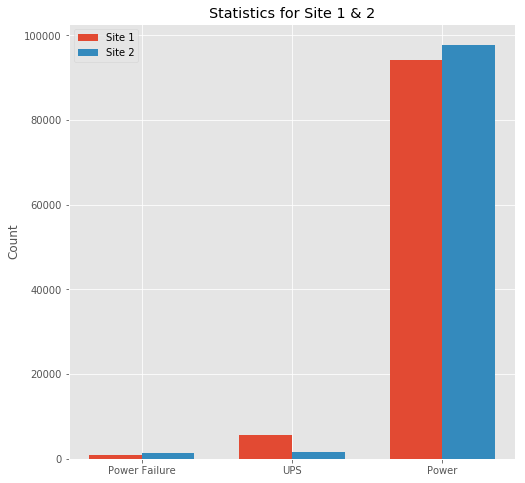

In [9]:
plt.figure(figsize=(8,8))
width = 0.35       
plt.bar(site_1_stats.Value, site_1_stats.Count, width, label='Site 1')
plt.bar(site_2_stats.Value + width, site_2_stats.Count, width, label='Site 2')

plt.ylabel('Count')
plt.title('Statistics for Site 1 & 2')

plt.xticks(site_1_stats.Value + width / 2, ('Power', 'UPS', 'Power Failure'))
plt.legend(loc='best')
plt.show()

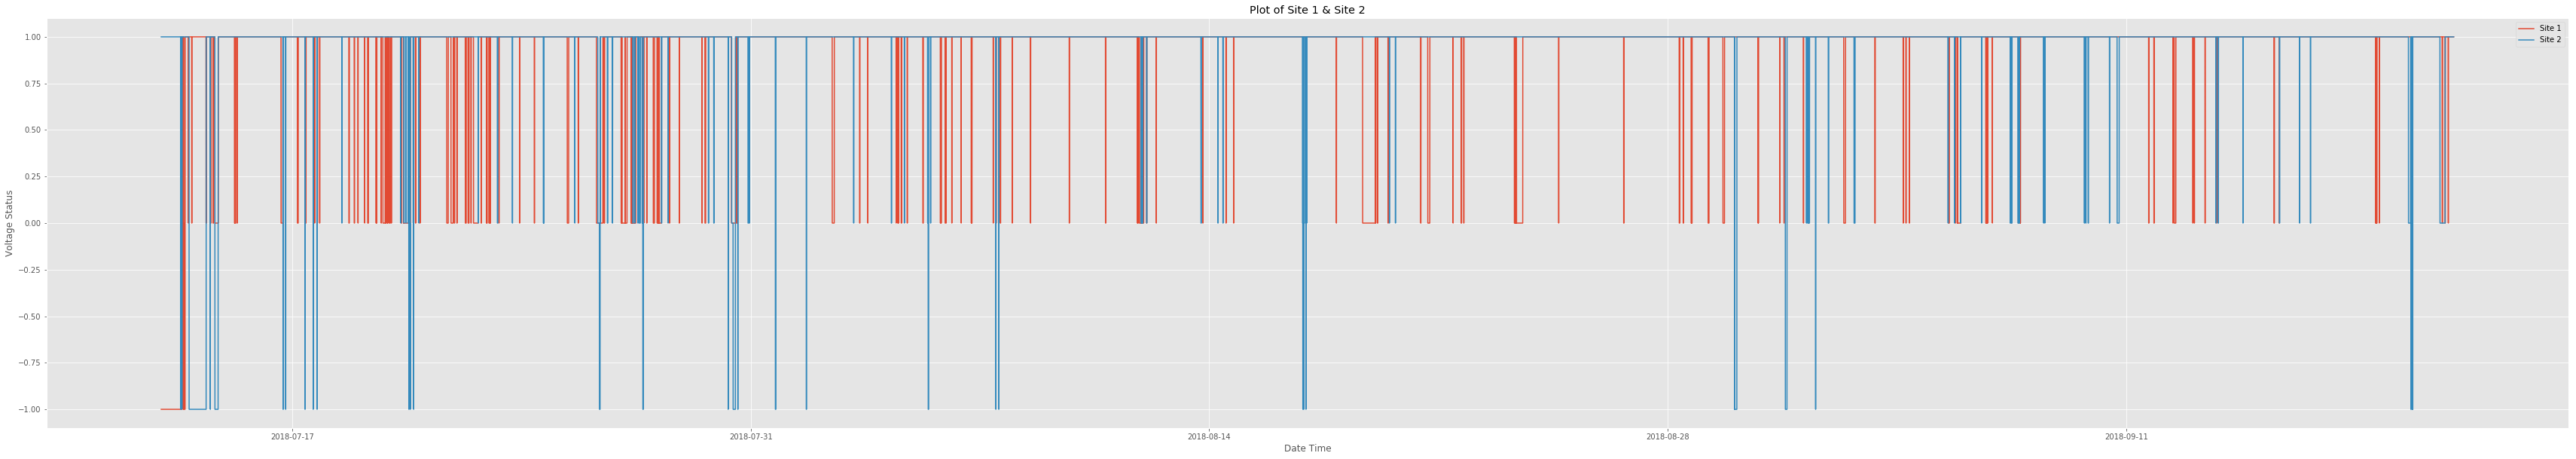

In [10]:
plt.figure(figsize=(60,10))
plt.plot(df.datetime, df.site_1, label='Site 1')
plt.plot(df.datetime, df.site_2, label='Site 2')

plt.xlabel('Date Time')
plt.ylabel('Voltage Status')
plt.title('Plot of Site 1 & Site 2')
plt.legend()
plt.show()

From the above value count statement, now we know

__Site 1__

1.  1.0000  :  94250 - Minutes Power Supply was there 
2.  0.0001  :  5570 - Minutes Power Supply was not there, but ups provided backup
3. -1.0000  :   980 - Minutes No Power Supply no UPS backup

__Site 2__

1.  1.0000  : 97795 Minutes Power Supply was there 
2.  0.0001  :  1585 Minutes Power Supply was not there, but ups provided backup
3. -1.0000  :  1420 Minutes No Power Supply no UPS backup



Value_grp are state change variables for site 1 & 2

In [11]:
df['value_grp_S1'] = (df['site_1'].diff(1) != 0).astype('int').cumsum()
valgrp1 = df.groupby(['value_grp_S1','site_1'])['site_1'].sum()
valgrp1 = pd.DataFrame({'Site1Value':valgrp1.index, 'CumSum':valgrp1.values})
valgrp1['Datetime'] = df['datetime']
valgrp1['Index'],valgrp1['Value'] = zip(*valgrp1.Site1Value)
valgrp1 = valgrp1[['Datetime','Index','Value', 'CumSum']]

df['value_grp_S2'] = (df['site_2'].diff(1) != 0).astype('int').cumsum()
valgrp2 = df.groupby(['value_grp_S2','site_2'])['site_2'].sum()
valgrp2 = pd.DataFrame({'Site2Value':valgrp2.index, 'CumSum':valgrp2.values})
valgrp2['Datetime'] = df['datetime']
valgrp2['Index'],valgrp2['Value'] = zip(*valgrp2.Site2Value)
valgrp2 = valgrp2[['Datetime','Index','Value', 'CumSum']]

In [12]:
df.head()

,datetime,date,time,day_of_week,site_1,site_2,value_grp_S1,value_grp_S2
0,2018-07-13 00:00:00,2018-07-13,00:00:00,Friday,-1.0,1.0,1,1
1,2018-07-13 00:01:00,2018-07-13,00:01:00,Friday,-1.0,1.0,1,1
2,2018-07-13 00:02:00,2018-07-13,00:02:00,Friday,-1.0,1.0,1,1
3,2018-07-13 00:03:00,2018-07-13,00:03:00,Friday,-1.0,1.0,1,1
4,2018-07-13 00:04:00,2018-07-13,00:04:00,Friday,-1.0,1.0,1,1


In [13]:
valgrp1.info()
valgrp1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 4 columns):
Datetime    361 non-null datetime64[ns]
Index       361 non-null int32
Value       361 non-null float64
CumSum      361 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 9.9 KB


,Datetime,Index,Value,CumSum
0,2018-07-13 00:00:00,1,-1.0000,-921.0000
1,2018-07-13 00:01:00,2,1.0000,19.0000
2,2018-07-13 00:02:00,3,0.0001,0.0001
3,2018-07-13 00:03:00,4,1.0000,34.0000
4,2018-07-13 00:04:00,5,-1.0000,-3.0000


In [14]:
valgrp2.info()
valgrp2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 4 columns):
Datetime    219 non-null datetime64[ns]
Index       219 non-null int32
Value       219 non-null float64
CumSum      219 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 6.1 KB


,Datetime,Index,Value,CumSum
0,2018-07-13 00:00:00,1,1.0,858.0
1,2018-07-13 00:01:00,2,-1.0,-4.0
2,2018-07-13 00:02:00,3,1.0,46.0
3,2018-07-13 00:03:00,4,-1.0,-4.0
4,2018-07-13 00:04:00,5,1.0,313.0


__From Data frame valgrp1 & valgrp2 we can identify the following__

1. Number & Duration of Power Failures.
2. Number of times & Duration for which UPS did not provide any backup.
3. Number of times & Duration for which UPS provided backup.

#### Assumptions made

    - *number of power failures : total number of events when value was either 0 or NaN: 5570+980 =  
    - *Number of times & Duration for which UPS did not provide any backup when value was NaN: 980
    - *Number of times & Duration for which UPS provided backup. when value was 0: 5570
    

In [15]:
# Problem solutions at site 1

valgrp1_UF = valgrp1.loc[valgrp1['Value'] == -1.0]
num_UF_s1 = len(valgrp1_UF.index)# returns no of ups failure
sum_UF_s1 = valgrp1_UF['CumSum'].sum()*-1 # returns total duration of ups failure

print('Number of time UPS did not provide any backup at site 1: ',num_UF_s1)
print('Total duration of UPS did not provide any backup : ', sum_UF_s1)

valgrp1_UPS = valgrp1.loc[valgrp1['Value'] == 0.0001]
num_UPS_s1 = len(valgrp1_UPS.index)# returns no of ups failure
sum_UPS_s1 = valgrp1_UPS['CumSum'].sum()*10000 # returns total duration of ups failure

print('Number of time UPS provided backup at site 1: ',num_UPS_s1)
print('Total duration of UPS provided backup : ', sum_UPS_s1)

num_PF_s1 = num_UF_s1 + num_UPS_s1 # returns no of power failure
sum_PF_s1 = sum_UF_s1 + sum_UPS_s1 # returns total duration of power failure

print('Number of power failures at site 1: ',num_PF_s1)
print('Total duration of power failure: ', sum_PF_s1)


Number of time UPS did not provide any backup at site 1:  3
Total duration of UPS did not provide any backup :  980.0
Number of time UPS provided backup at site 1:  178
Total duration of UPS provided backup :  5570.000000000001
Number of power failures at site 1:  181
Total duration of power failure:  6550.000000000001


In [16]:
# Problem solutions at site 2

valgrp2_UF = valgrp2.loc[valgrp2['Value'] == -1.0]
num_UF_s2 = len(valgrp2_UF.index)# returns no of ups failure
sum_UF_s2 = valgrp2_UF['CumSum'].sum()*-1 # returns total duration of ups failure

print('Number of time UPS did not provide any backup at site 2: ',num_UF_s2)
print('Total duration of UPS did not provide any backup : ', sum_UF_s2)

valgrp2_UPS = valgrp2.loc[valgrp2['Value'] == 0.0001]
num_UPS_s2 = len(valgrp1_UPS.index)# returns no of ups failure
sum_UPS_s2 = valgrp2_UPS['CumSum'].sum()*10000 # returns total duration of ups failure

print('Number of time UPS provided backup at site 2: ',num_UPS_s2)
print('Total duration of UPS provided backup : ', sum_UPS_s2)

num_PF_s2 = num_UF_s2 + num_UPS_s2 # returns no of power failure
sum_PF_s2 = sum_UF_s2 + sum_UPS_s2 # returns total duration of power failure

print('Number of power failures at site 2: ',num_PF_s2)
print('Total duration of power failure: ', sum_PF_s2)


Number of time UPS did not provide any backup at site 2:  33
Total duration of UPS did not provide any backup :  1420.0
Number of time UPS provided backup at site 2:  178
Total duration of UPS provided backup :  1584.9999999999995
Number of power failures at site 2:  211
Total duration of power failure:  3004.9999999999995


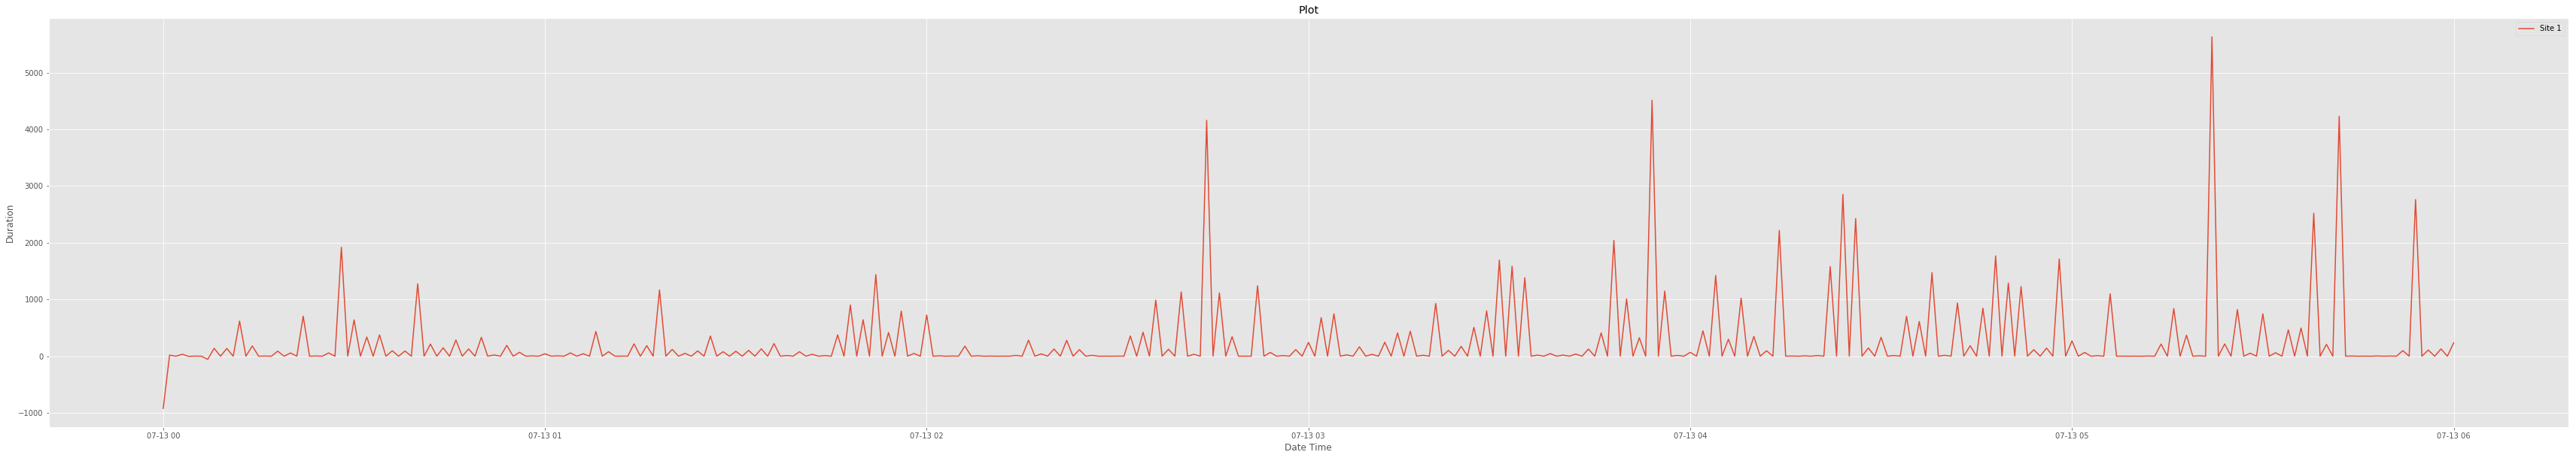

In [17]:
plt.figure(figsize=(60,10))
plt.plot(valgrp1.Datetime, valgrp1.CumSum, label='Site 1')
plt.xlabel('Date Time')
plt.ylabel('Duration')
plt.title('Plot')
plt.legend()
plt.show()

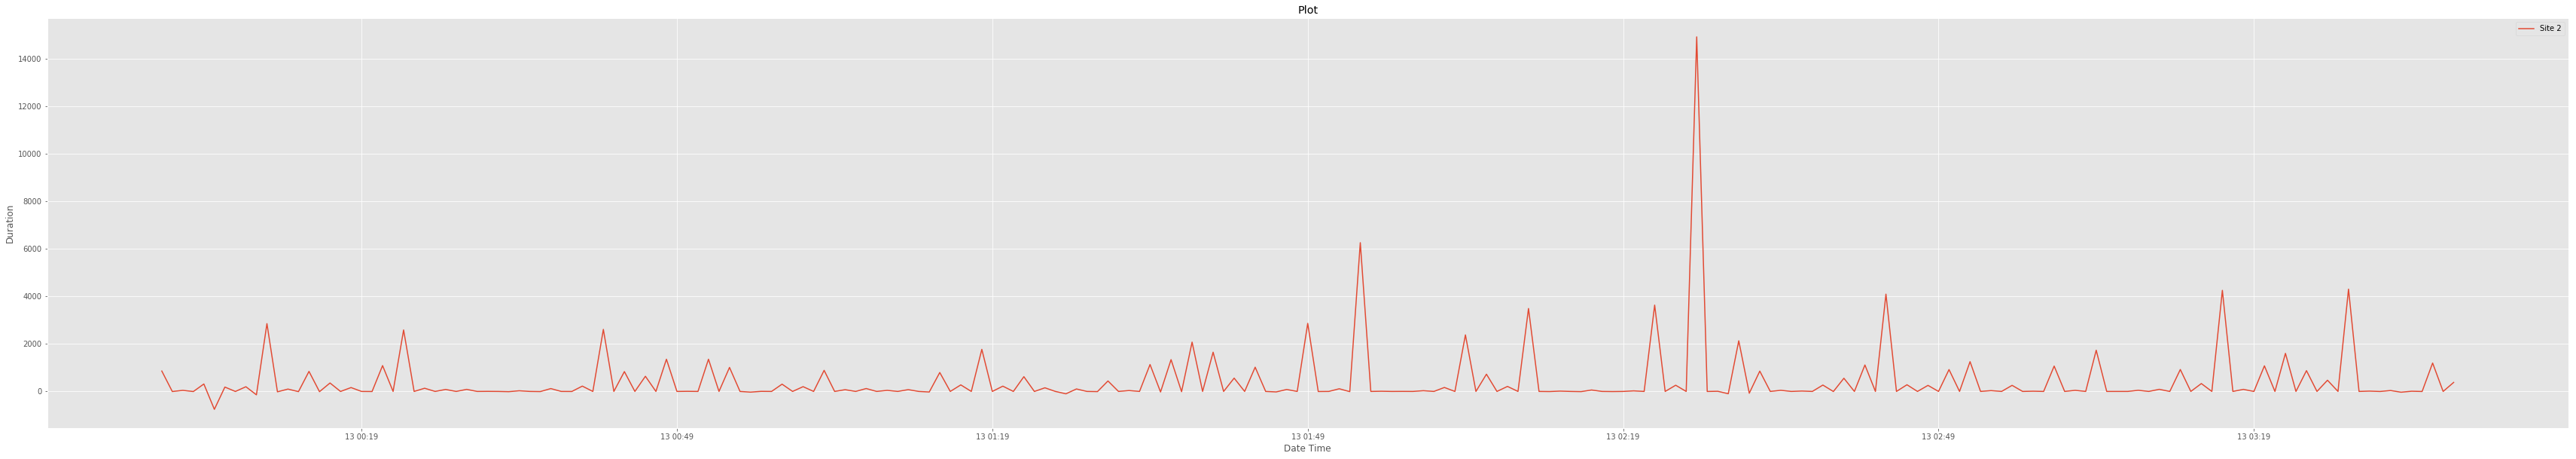

In [18]:
plt.figure(figsize=(60,10))
plt.plot(valgrp2.Datetime, valgrp2.CumSum, label='Site 2')
plt.xlabel('Date Time')
plt.ylabel('Duration')
plt.title('Plot')
plt.legend()
plt.show()

In [19]:
daygrp1 = df.groupby(['day_of_week','site_1']).size()
daygrp1 = pd.DataFrame({'day':daygrp1.index, 'Count':daygrp1.values})
daygrp1['Day'],daygrp1['Value'] = zip(*daygrp1.day)
daygrp1 = daygrp1[['Day','Value','Count']]
daygrp1

,Day,Value,Count
0,Friday,-1.0000,980
1,Friday,0.0001,928
2,Friday,1.0000,12492
3,Monday,0.0001,498
4,Monday,1.0000,13902
5,Saturday,0.0001,1335
6,Saturday,1.0000,13065
7,Sunday,0.0001,757
8,Sunday,1.0000,13643
9,Thursday,0.0001,1175


In [20]:
daygrp2 = df.groupby(['day_of_week','site_2']).size()
daygrp2 = pd.DataFrame({'day':daygrp2.index, 'Count':daygrp2.values})
daygrp2['Day'],daygrp2['Value'] = zip(*daygrp2.day)
daygrp2 = daygrp2[['Day','Value','Count']]
daygrp2.head()

,Day,Value,Count
0,Friday,-1.0000,340
1,Friday,0.0001,339
2,Friday,1.0000,13721
3,Monday,-1.0000,132
4,Monday,0.0001,246


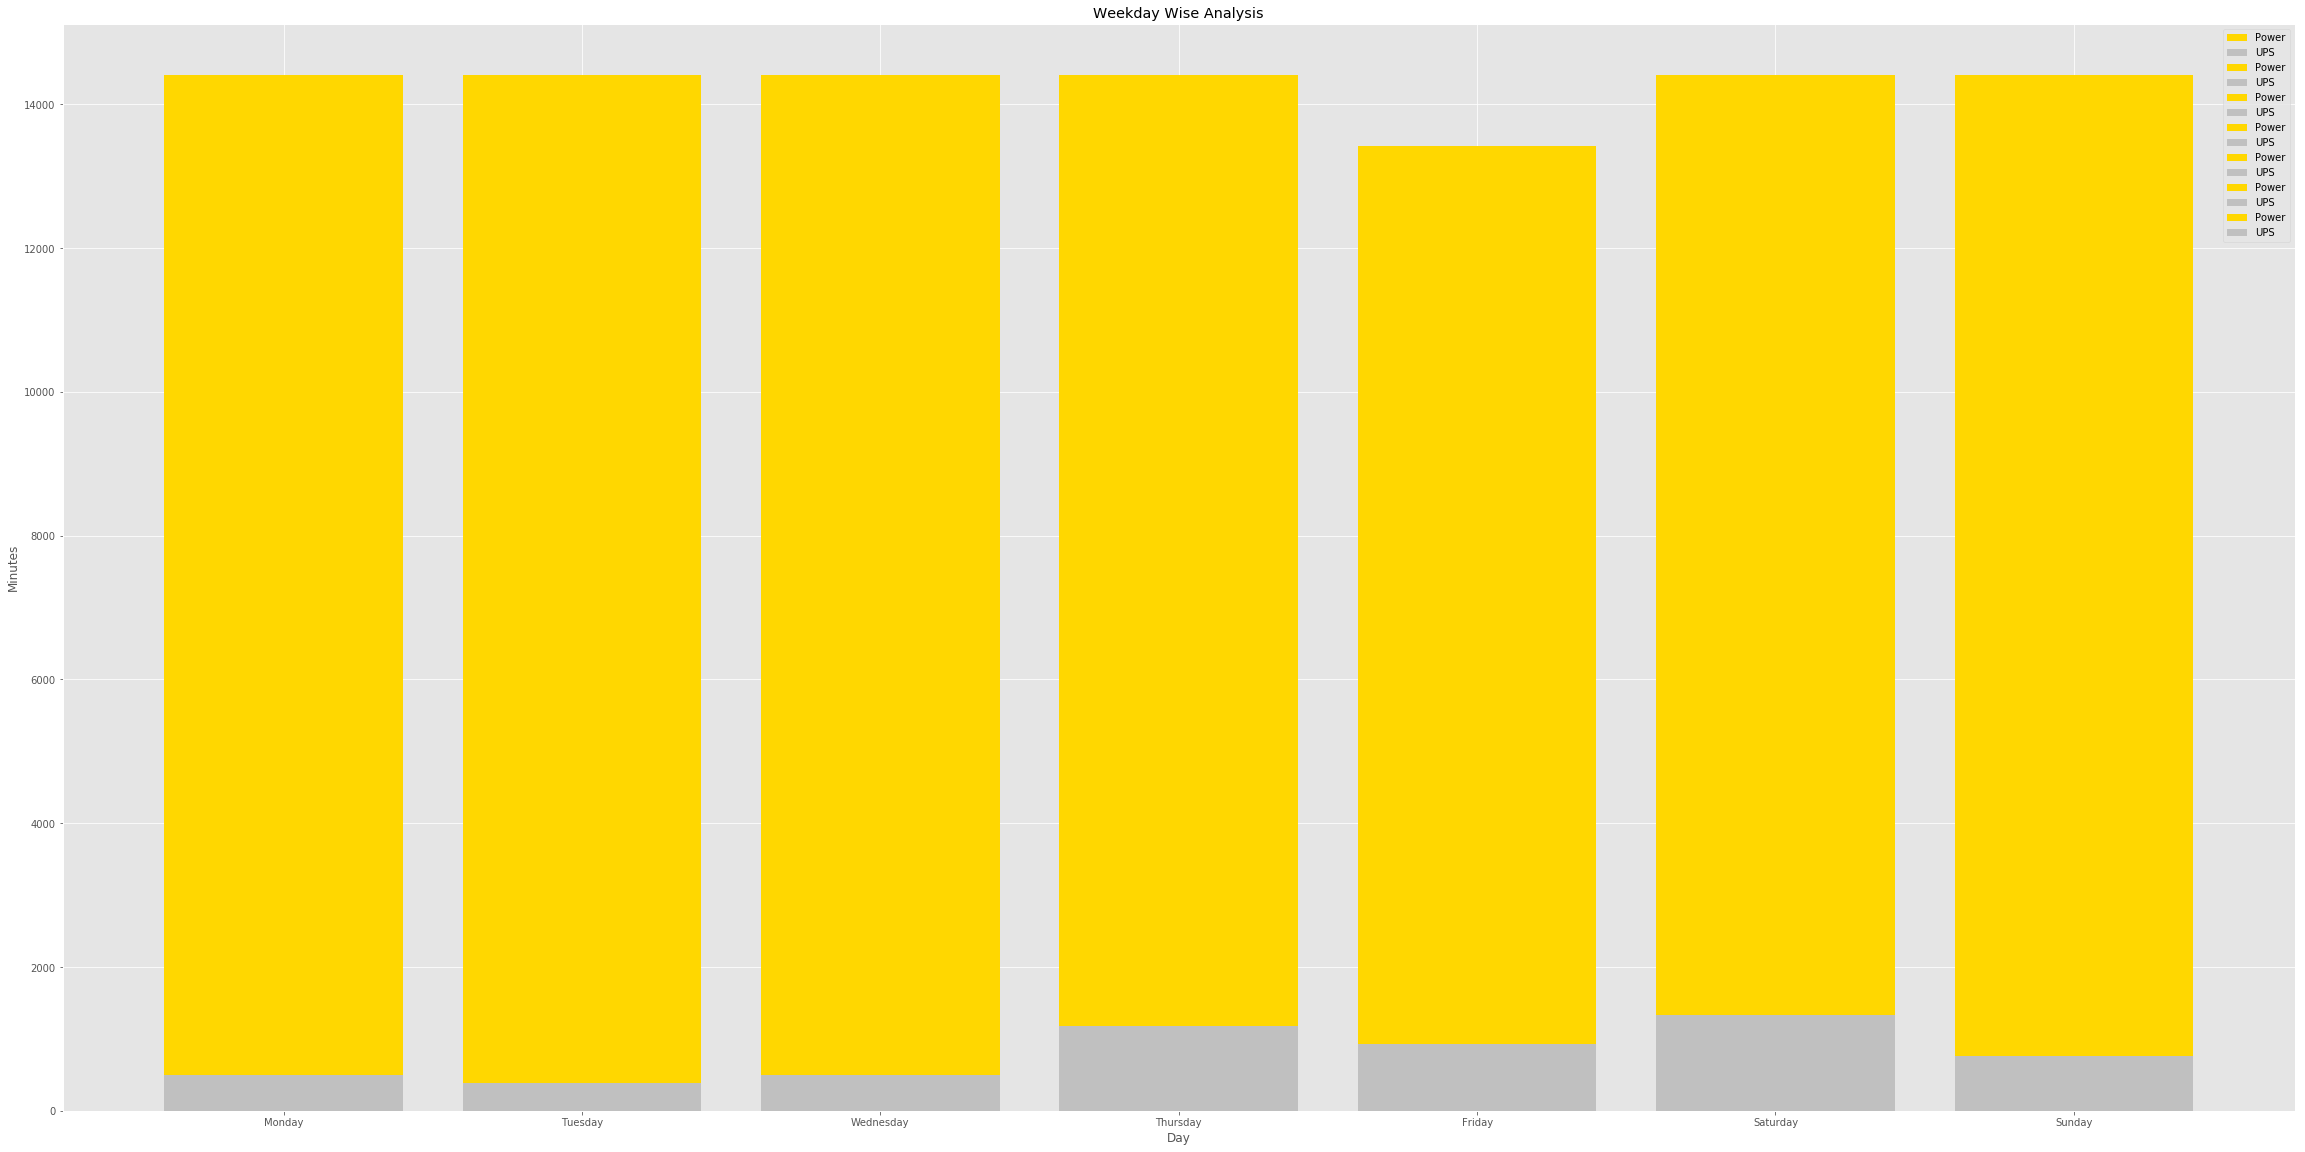

In [21]:
mon = daygrp1.loc[daygrp1['Day'] == 'Monday']
tue = daygrp1.loc[daygrp1['Day'] == 'Tuesday']
wed = daygrp1.loc[daygrp1['Day'] == 'Wednesday']
thu = daygrp1.loc[daygrp1['Day'] == 'Thursday']
fri = daygrp1.loc[daygrp1['Day'] == 'Friday']
sat = daygrp1.loc[daygrp1['Day'] == 'Saturday']
sun = daygrp1.loc[daygrp1['Day'] == 'Sunday']

day = [mon, tue, wed, thu, fri, sat, sun]

plt.figure(figsize=(40,20))

for x in day:
    ind = x.Day.values[0]
    
    power = x.loc[x['Value'] == 1.0000].Count.values[0]
    ups = x.loc[x['Value'] == 0.0001].Count.values[0]
    #powerFail = x.loc[x['Value'] == -1.0000].Count.values[0]


    plt.bar(ind, power, width=0.8, label='Power', color='gold', bottom=ups)
    plt.bar(ind, ups, width=0.8, label='UPS', color='silver')
    #plt.bar(ind, ups, width=0.8, label='UPS', color='red')

plt.ylabel("Minutes")
plt.xlabel("Day")
plt.legend(loc="upper right")
plt.title("Weekday Wise Analysis")
    

plt.show()


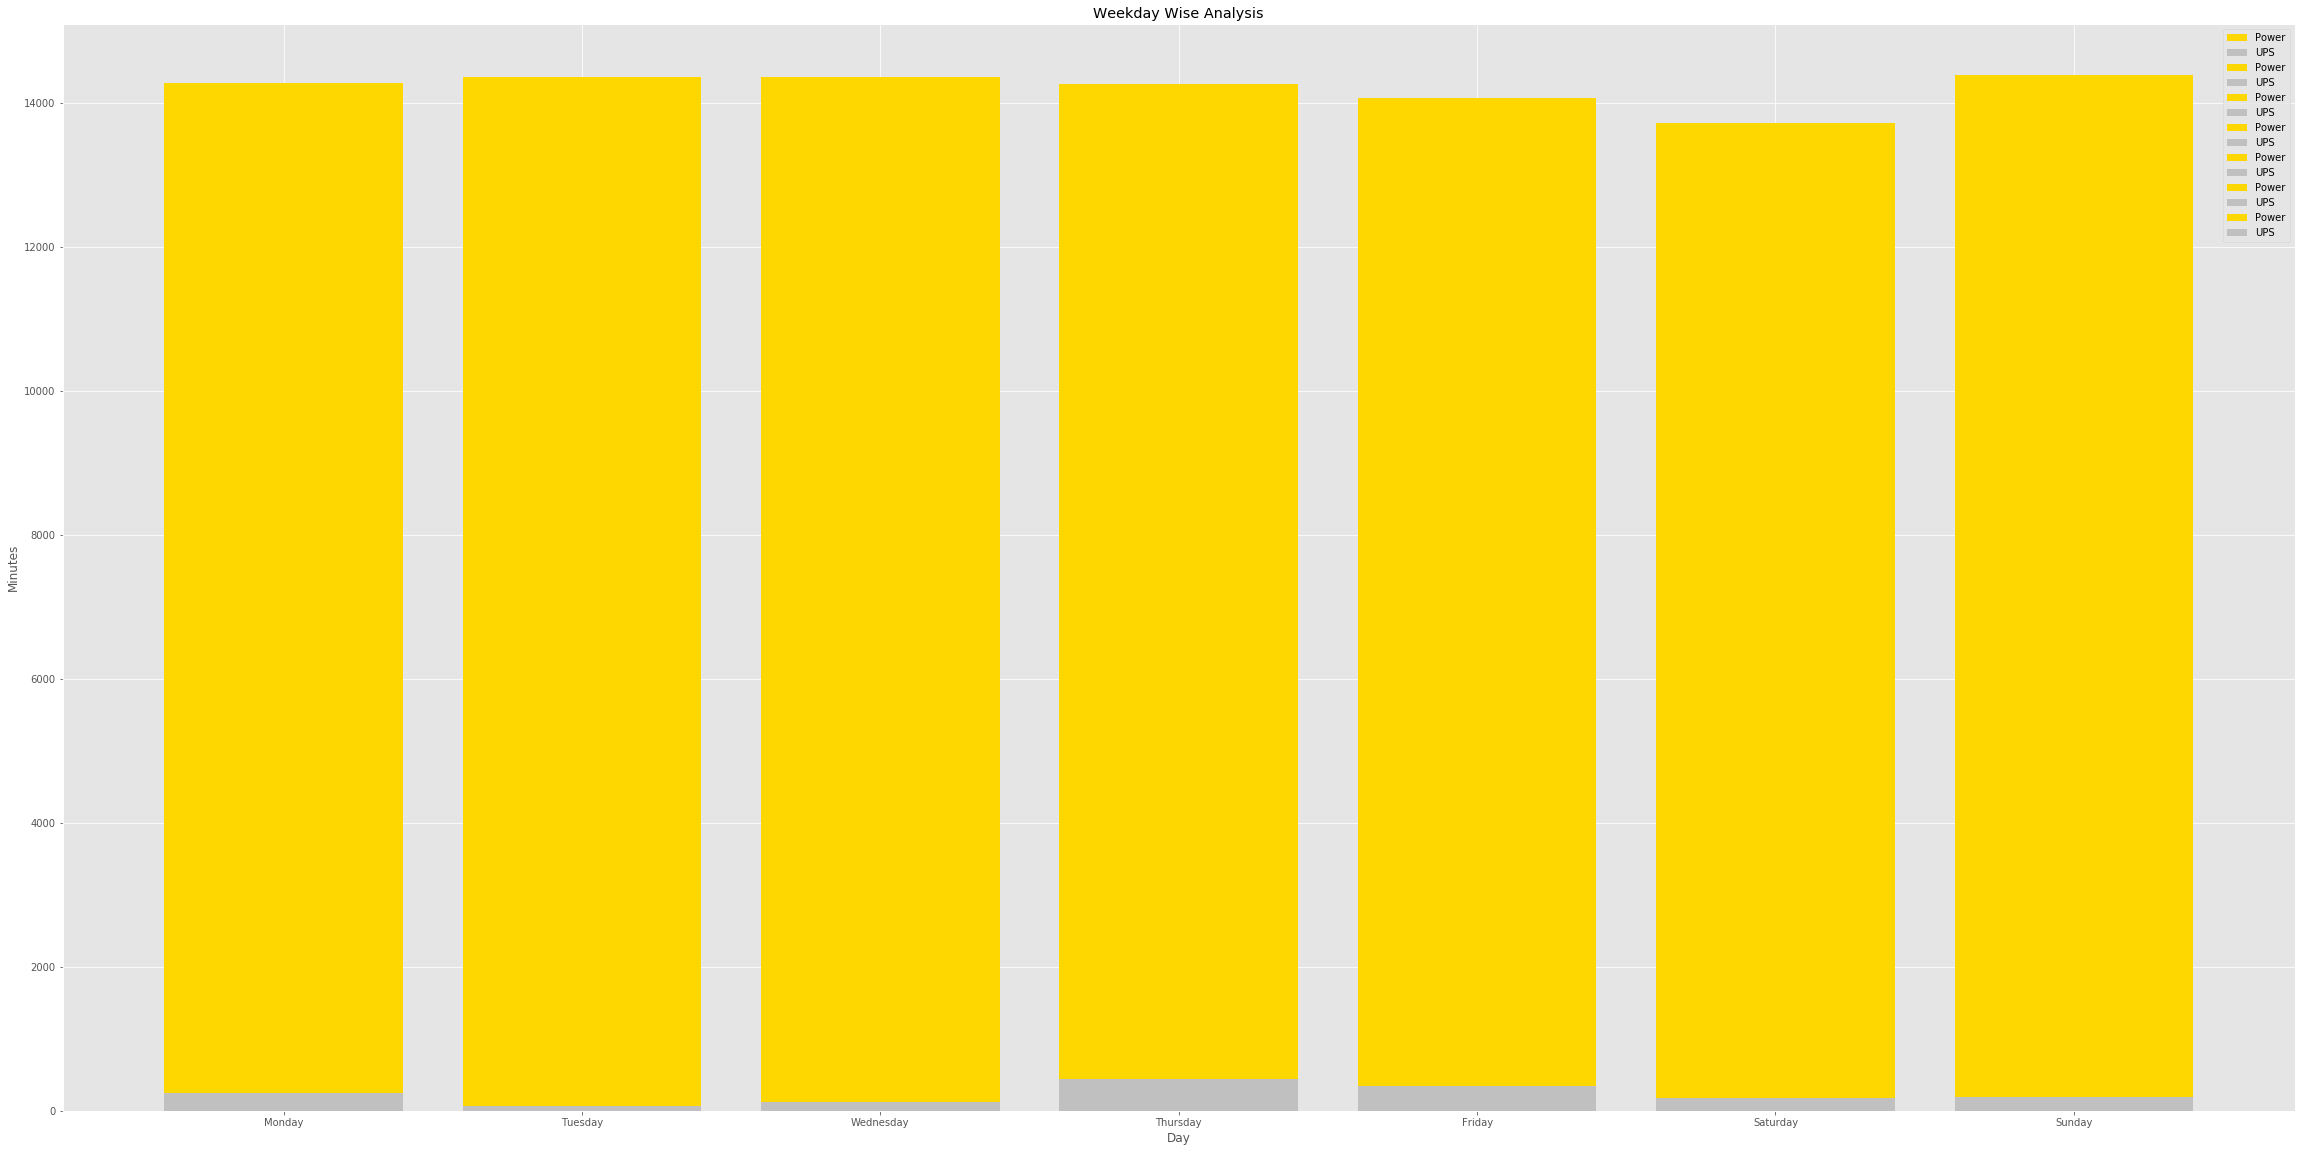

In [22]:
mon = daygrp2.loc[daygrp2['Day'] == 'Monday']
tue = daygrp2.loc[daygrp2['Day'] == 'Tuesday']
wed = daygrp2.loc[daygrp2['Day'] == 'Wednesday']
thu = daygrp2.loc[daygrp2['Day'] == 'Thursday']
fri = daygrp2.loc[daygrp2['Day'] == 'Friday']
sat = daygrp2.loc[daygrp2['Day'] == 'Saturday']
sun = daygrp2.loc[daygrp2['Day'] == 'Sunday']

day = [mon, tue, wed, thu, fri, sat, sun]

plt.figure(figsize=(40,20))

for x in day:
    ind = x.Day.values[0]
    
    power = x.loc[x['Value'] == 1.0000].Count.values[0]
    ups = x.loc[x['Value'] == 0.0001].Count.values[0]
    #powerFail = x.loc[x['Value'] == -1.0000].Count.values[0]


    plt.bar(ind, power, width=0.8, label='Power', color='gold', bottom=ups)
    plt.bar(ind, ups, width=0.8, label='UPS', color='silver')
    #plt.bar(ind, ups, width=0.8, label='UPS', color='red')

plt.ylabel("Minutes")
plt.xlabel("Day")
plt.legend(loc="upper right")
plt.title("Weekday Wise Analysis")
    

plt.show()

## Problem Statement:

#### Summarise the instances of Power Failure on the following grounds:
    1. Number & Duration of Power Failures.
    2. Number of times & Duration for which UPS did not provide any backup.
    3. Number of times & Duration for which UPS provided backup.
    4. Any Trends/Patterns in the Power Failure.
    5. Compare the UPS performance at 2 sites

__Also compare the two sites on the basis of above analysis.__
__Try to summarise your observations using some self-explanatory plots.__


Solutions

1. Number & Duration of Power Failures.

    - Site 1: 181 Times, 6550 Minutes
    - Site 2: 211 Times, 3005 Minutes
        
        
2. Number of times & Duration for which UPS did not provide any backup.

    - Site 1: 3 Times, 980 Minutes
    - Site 2: 33 Times, 1420 Minutes
    
        
3. Number of times & Duration for which UPS provided backup.

    - Site 1:178 Times, 5570 Minutes
    - Site 2:178 Times, 1585 Minutes
        
        
4. Any Trends/Patterns in the Power Failure.
    - site 1: only on fridays complete power failure is seen
        
        
5. Compare the UPS performance at 2 sites
    - Site 1 utilizes UPS more efficiently almost 3 times more utilization is seen
    

